# Dataset Exploration and Preparation 🔎

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('archive/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
print("Shape of the dataset is:", df.shape)
print("No. of rows:",df.shape[0])
print("No. of columns",df.shape[1])

Shape of the dataset is: (8807, 12)
No. of rows: 8807
No. of columns 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning 🧹

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

0

There are too many missing values in the columns director, cast and country. Its reasonable to not drop them as it will lead to loss of significant amount of data. Thus, I'm replacing those NaN values with 'Unknown'.

In [8]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].replace(np.nan, "Unknown ")

And for remaining columns, there is no harm to drop'em

In [9]:
df.dropna(subset=['rating','duration','date_added'],inplace =True) 

In [10]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data is clean now! 🧼

## Some preprocessing

In [11]:
df['date_added']=df['date_added'].astype('datetime64[ms]')

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df['year_added']= df ['date_added'].dt.year
df['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: int32

In [14]:
df['month_added']= df ['date_added'].dt.month_name()
df['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8790, dtype: object

In [15]:
def get_category(rating):
    # Dictionary with categories
    categories = {
        'kids': ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'],
        'all': ['PG', 'TV-PG'],
        'adults': ['R', 'NC-17', 'TV-MA', 'UR', 'NR'],
        'teens': ['PG-13', 'TV-14']
    }
    for category, ratings in categories.items():
        if rating in ratings:
            return category.capitalize()  # Capitalize the category name
    return None

In [16]:
df['category'] = df['rating'].apply(get_category)

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults


## Let's 'See' 👀

### 1. Distribution of Content Types

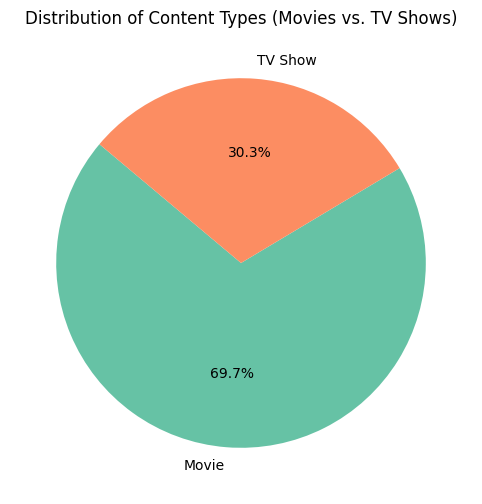

In [18]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Distribution of Content Types (Movies vs. TV Shows)', fontsize=12)
plt.show()

### 2. Number of Releases Over the Years

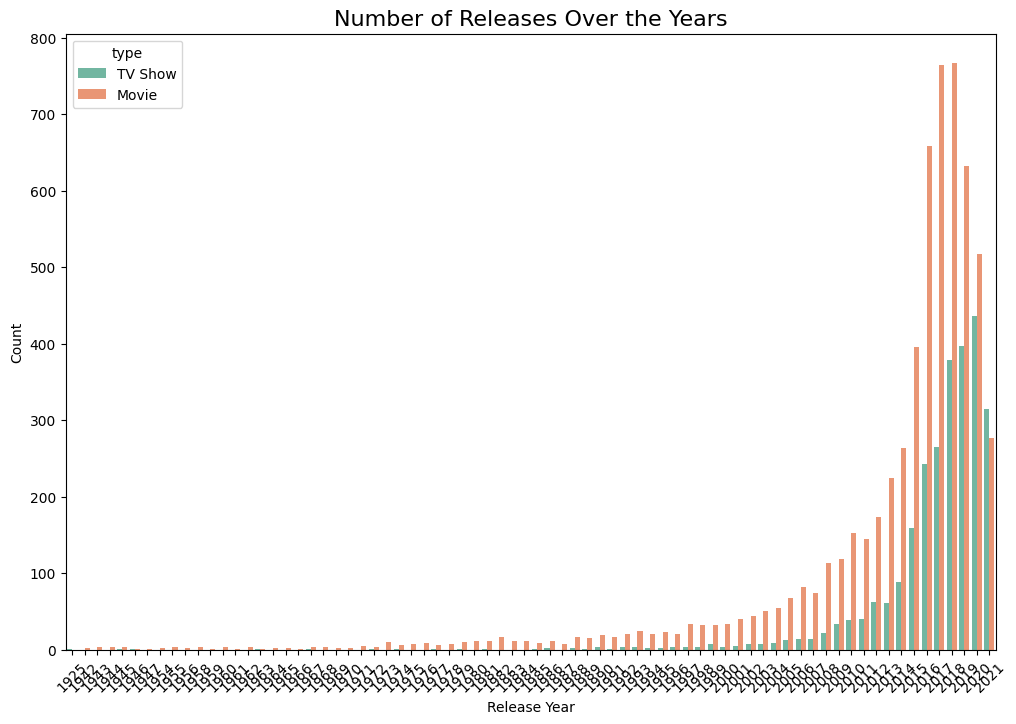

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='release_year', hue='type', palette='Set2', order=df['release_year'].value_counts().index.sort_values())
plt.title('Number of Releases Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. No. of Movies/ TV shows added by month

C:\Users\adibo\AppData\Local\Temp\ipykernel_14008\1211006192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', palette='Set2', order=df['month_added'].value_counts().index)


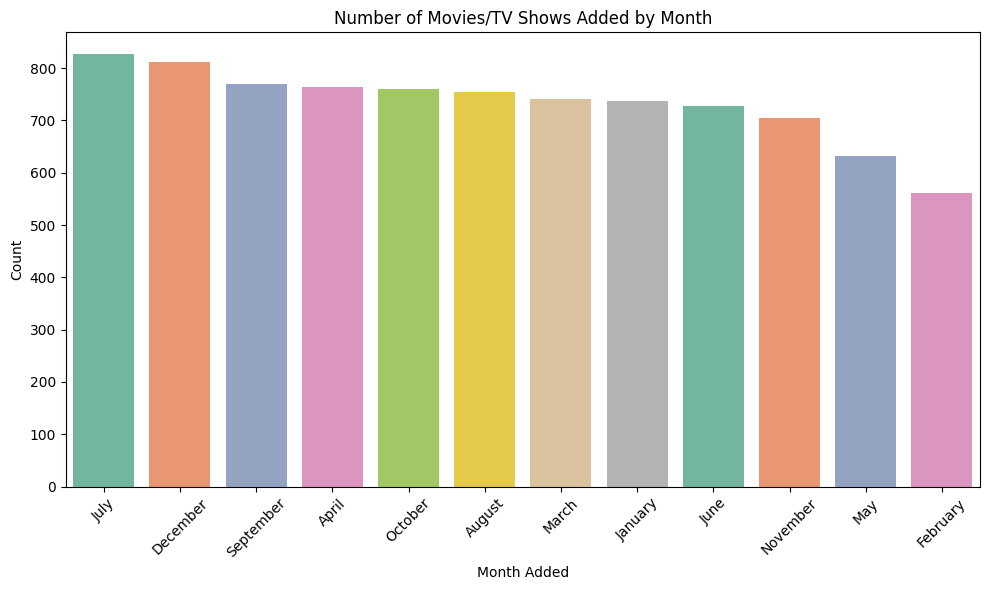

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month_added', palette='Set2', order=df['month_added'].value_counts().index)
plt.title('Number of Movies/TV Shows Added by Month')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Top 10 Countries with Most Content

C:\Users\adibo\AppData\Local\Temp\ipykernel_14008\1454949086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['country'].isin(top_countries)], y='country', palette='magma', order=top_countries)


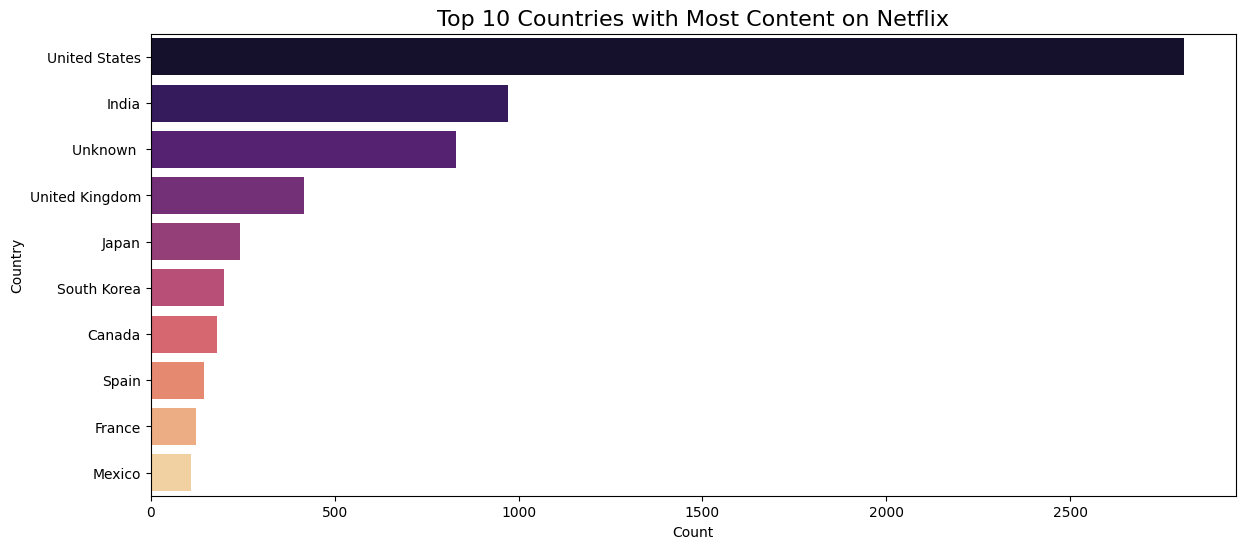

In [21]:
plt.figure(figsize=(14, 6))
top_countries = df['country'].value_counts().head(10).index
sns.countplot(data=df[df['country'].isin(top_countries)], y='country', palette='magma', order=top_countries)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### 5. Distribution of Ratings

C:\Users\adibo\AppData\Local\Temp\ipykernel_14008\959176281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', palette='magma', order=df['rating'].value_counts().index)


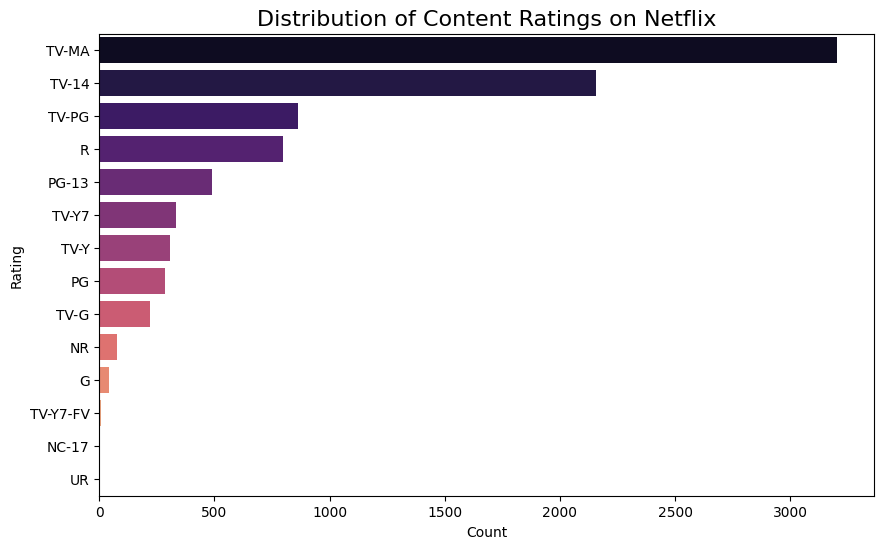

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', palette='magma', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


### 6. Content Duration for Movies

C:\Users\adibo\AppData\Local\Temp\ipykernel_14008\752831996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(int)


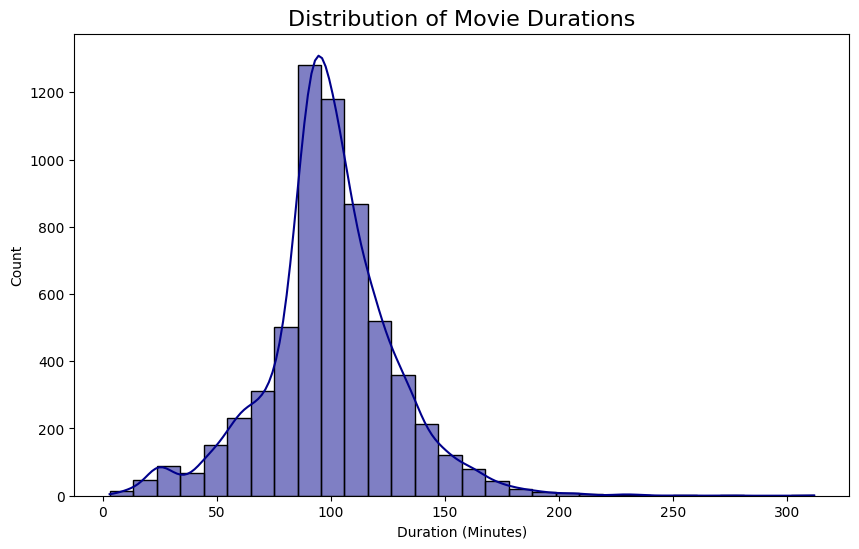

In [23]:
# Filtering only Movies and extracting durations
movies_df = df[df['type'] == 'Movie']
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()


### 7. Top 10 Genres/Listed Categories

C:\Users\adibo\AppData\Local\Temp\ipykernel_14008\2892248198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='magma')


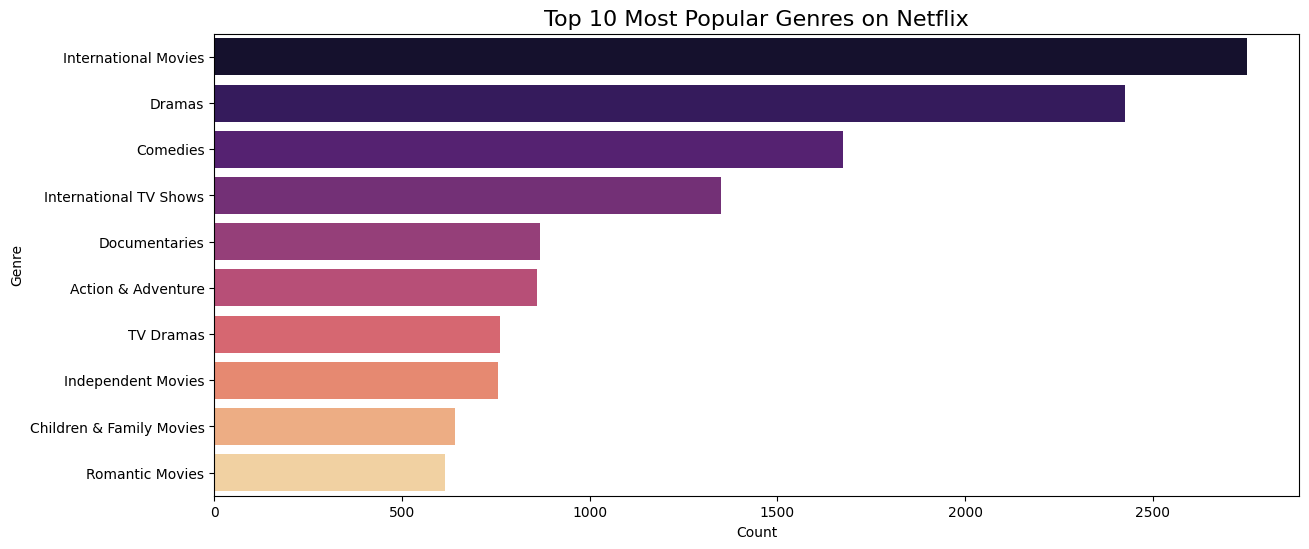

In [24]:
# Splitting genres/listed categories
df['listed_in'] = df['listed_in'].str.split(', ')
all_genres = sum(df['listed_in'], [])

plt.figure(figsize=(14, 6))
top_genres = pd.Series(all_genres).value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='magma')
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Framing Questions and Gaining Insights ❔

## 1. What genres are most popular on Netflix over time?

According to the above plotted bar plot, it is clear that International Movies, Drama and Comedy are the most popular genres on Netflix.

## 2. How does the type of content (movie vs. TV show) correlate with the release year?

According to the plot titled 'Number of release over the years', over the years, both content types are incresing exponentially in terms of their counts. Movies made a rapid growth as compared to TV Show. The growth of TV shows, while slower compared to movies, could suggest an increasing interest in serialized content. This might be due to the rise of streaming platforms that offer original series and the shift from traditional TV to on-demand streaming.

## 3. What is the impact of the release year on the likelihood of a show being added to Netflix?

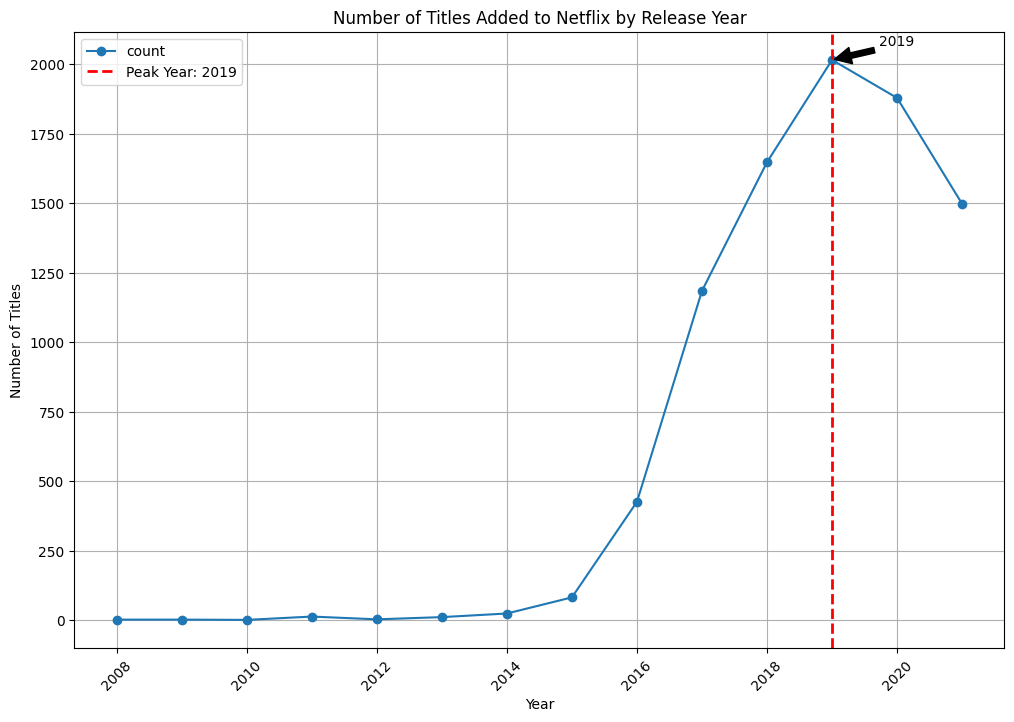

In [25]:
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
ax = titles_per_year.plot(kind='line', marker='o')

peak_year = titles_per_year.idxmax()
peak_value = titles_per_year.max()

plt.axvline(x=peak_year, color='red', linestyle='--', linewidth=2, label=f'Peak Year: {peak_year}')

plt.annotate(f'{peak_year}', xy=(peak_year, peak_value), xytext=(peak_year+1, peak_value + 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

plt.title('Number of Titles Added to Netflix by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


The observed decline in the number of titles added to Netflix after 2019, despite previous rapid growth, reflects a strategic shift by the company. Initially, Netflix focused on aggressively expanding its content library and investing in original productions. However, post-2019, the increase in streaming competition, coupled with the disruptions caused by the COVID-19 pandemic forced Netflix to shift its focus from quantity to quality. This adjustment highlights Netflix's adaptation to evolving industry dynamics.

## 4. Are there any correlations between the length of content and its rating?

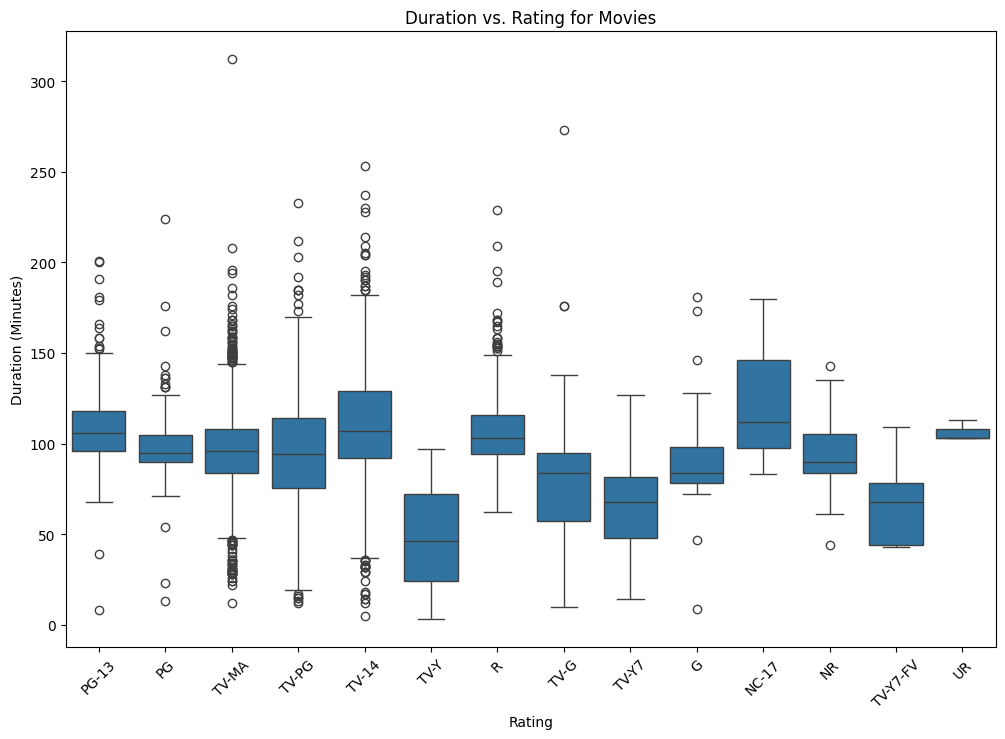

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=movies_df, x='rating', y='duration_minutes')
plt.title('Duration vs. Rating for Movies')
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()


The median duration varies slightly between ratings. For example, ‘PG-13’ and ‘R’ rated movies generally have longer median durations compared to ‘G’ or ‘PG’ rated movies.
Several ratings have outliers, indicating movies with durations significantly different from the typical range for that rating. For instance, TV-MA, TV-PG, TV-14 have notable no. of outliers.

## 5. How Does the Genre Distribution of Netflix Content in India Compare to Other Major Markets?

<Figure size 1400x800 with 0 Axes>

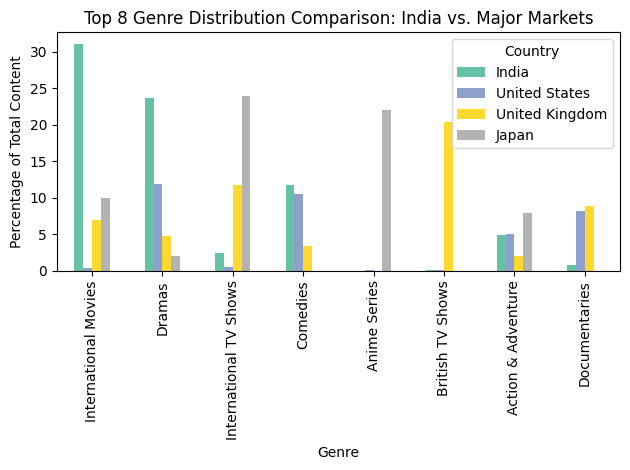

In [27]:
df['genres'] = df['listed_in']

# Function to calculate genre distribution for a given list of countries
def get_genre_distribution(df, countries):
    filtered_df = df[df['country'].isin(countries)].copy()
    genre_distribution = filtered_df.explode('genres')['genres'].value_counts()
    return genre_distribution

# Get genre counts for each country separately
india_genres = get_genre_distribution(df, ['India'])
us_genres = get_genre_distribution(df, ['United States'])
uk_genres = get_genre_distribution(df, ['United Kingdom'])
japan_genres = get_genre_distribution(df, ['Japan'])

# Combine the genre counts into a DataFrame
genre_comparison = pd.DataFrame({
    'India': india_genres,
    'United States': us_genres,
    'United Kingdom': uk_genres,
    'Japan': japan_genres
}).fillna(0)

# Normalize the counts to percentages for comparison
genre_comparison = genre_comparison.div(genre_comparison.sum(axis=0), axis=1) * 100

# Select the top N genres (e.g., top 8 genres)
top_genres = genre_comparison.mean(axis=1).nlargest(8).index

# Filter the DataFrame to include only the top genres
filtered_genre_comparison = genre_comparison.loc[top_genres]

# Plot genre distribution comparison
plt.figure(figsize=(14, 8))
filtered_genre_comparison.plot(kind='bar', colormap='Set2')
plt.title('Top 8 Genre Distribution Comparison: India vs. Major Markets')
plt.xlabel('Genre')
plt.ylabel('Percentage of Total Content')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


- The high percentage of International Movies in India suggests a strong demand for diverse, global content. This could indicate that Indian audiences are open to different cultures and storytelling styles.
- The dominance of British TV Shows in the UK and Anime Series in Japan highlights the cultural influence and preference for local content. This suggests that content producers focus on creating culturally resonant content to engage local audiences effectively.
- The relatively lower percentage of TV Shows in India compared to other markets might indicate a saturation or a preference for other forms of entertainment, such as movies or web series. This could be an opportunity for TV show producers to innovate and capture more market share.


As most of the column are not numerical, the need to do statistical analysis suffices. Still, we can gain some insights as below:

In [28]:
numeric_columns = ['release_year', 'duration_minutes'] 
summary_stats = movies_df[numeric_columns].describe()

mode_values = movies_df[numeric_columns].mode().iloc[0]
summary_stats.loc['mode'] = mode_values

print("Summary Statistics: ")
print()
print(summary_stats)


Summary Statistics: 

       release_year  duration_minutes
count   6126.000000       6126.000000
mean    2013.120144         99.584884
std        9.681723         28.283225
min     1942.000000          3.000000
25%     2012.000000         87.000000
50%     2016.000000         98.000000
75%     2018.000000        114.000000
max     2021.000000        312.000000
mode    2018.000000         90.000000


# Mini Recommender System 🍿

In [29]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
description_vectorizer = TfidfVectorizer(stop_words='english')
description_matrix =  description_vectorizer.fit_transform(movies_df['description'])

In [31]:
genre_vectorizer = TfidfVectorizer(stop_words='english')
genre_matrix = genre_vectorizer.fit_transform(movies_df['listed_in']) 

In [32]:
combine_features = hstack([description_matrix, genre_matrix])
similarity_matrix = cosine_similarity(combine_features, combine_features)

In [33]:
def get_recommendation(title, top_n=10):
    idx = movies_df.index[movies_df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1: top_n+1]]
    return movies_df['title'].iloc[sim_indices]


recommendation = get_recommendation('Madagascar: Escape 2 Africa')

In [34]:
recommendation

4025    Jimmy Carr: The Best of Ultimate Gold Greatest...
3424          Martin Matte: La vie, la mort...eh la la..!
4944                                Fary Is the New Black
5230                         Christina P: Mother Inferior
5790          The Best of Rafał Rutkowski Olka Szczęśniak
5108                              Todd Barry: Spicy Honey
1645                   Larry the Cable Guy: Remain Seated
4505       Ron White: If You Quit Listening, I'll Shut Up
3646                      Demetri Martin: The Overthinker
2143             Rob Schneider: Asian Momma, Mexican Kids
Name: title, dtype: object